In [ ]:
import numpy
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D

#seed 값 설정
numpy.random.seed(3)
tf.random.set_seed(3)

train_data = pd.read_csv('/content/drive/MyDrive/인공지능/13week/train_SectionDataset.csv', header=0, names=['title', 'section'])
X_train = train_data['title']
Y_train = train_data['section']
test_data = pd.read_csv('/content/drive/MyDrive/인공지능/13week/test_SectionDataset.csv', header=0)
X_test = test_data['title']
Y_test = test_data['section']

# 데이터 확인하기
print("첫번째 학습셋 입력: ", X_train[0])
print("첫번째 테스트셋 입력: ", X_test[0])
Y_train_onehot = to_categorical(Y_train)
Y_test_onehot = to_categorical(Y_test)
print("첫번째 학습셋 결과 one-hot 출력: ", Y_train_onehot[0])
print("첫번째 테스트셋 결과 one-hot 출력: ", Y_test_onehot[0])

첫번째 학습셋 입력:  유시민 검찰도 사법도 썩었지 vs 진중권 유시민 망상 대중은 현실로 믿어
첫번째 테스트셋 입력:  박준영 “도자기 집에서 사용” 김선교 “궁궐 살았나”
첫번째 학습셋 결과 one-hot 출력:  [1. 0. 0. 0.]
첫번째 테스트셋 결과 one-hot 출력:  [1. 0. 0. 0.]


In [ ]:
token = Tokenizer()
token.fit_on_texts(X_train)
#print(token.word_index)
x_train = token.texts_to_sequences(X_train)

In [ ]:
train_max = max(len(item) for item in x_train)
print("학습셋 제목 최대 길이: ", train_max)

학습셋 제목 최대 길이:  18


In [ ]:
x_test = token.texts_to_sequences(X_test)
test_max = max(len(item) for item in x_test)
print("테스트셋 제목 최대 길이: ", test_max)

테스트셋 제목 최대 길이:  10


In [ ]:
word_size = len(token.word_index) + 1
print("전체 데이터셋 단어 토큰 개수: ", word_size)

전체 데이터셋 단어 토큰 개수:  22844


In [ ]:
print("첫번째 학습셋 토큰 결과: ",  x_train[0])
print("첫번째 테스트셋 토큰 결과: ",  x_test[0])

첫번째 학습셋 토큰 결과:  [238, 7160, 7161, 7162, 122, 404, 238, 7163, 7164, 4269, 4270]
첫번째 테스트셋 토큰 결과:  [1200]


In [ ]:
x_train = pad_sequences(x_train, train_max)
print("첫번째 학습셋 패딩 토큰: ", x_train[0])

x_test = pad_sequences(x_test, train_max)
print("첫번째 테스트셋 패딩 토큰: ", x_test[0])

첫번째 학습셋 패딩 토큰:  [   0    0    0    0    0    0    0  238 7160 7161 7162  122  404  238
 7163 7164 4269 4270]
첫번째 테스트셋 패딩 토큰:  [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0 1200]


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 100)         2284400   
                                                                 
 dropout_9 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_9 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, None, 64)          0         
 g1D)                                                            
                                                                 
 lstm_9 (LSTM)               (None, 55)                26400     
                                                                 
 dense_9 (Dense)             (None, 4)                 224       
                                                     

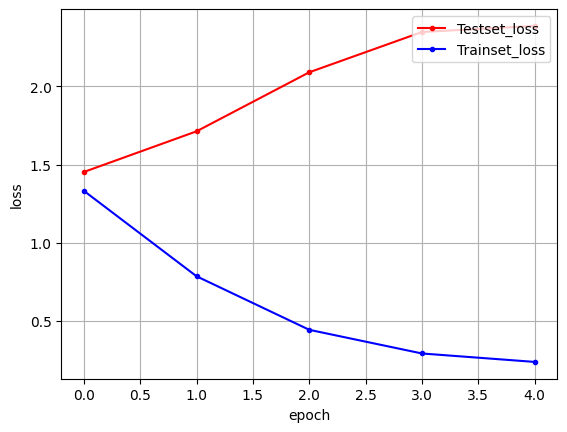

In [ ]:
# 모델의 설정
model = Sequential()
model.add(Embedding(word_size, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(4))
model.add(Activation('softmax'))
model.summary()

# 모델의 컴파일
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델의 실행
history = model.fit(x_train, Y_train, batch_size=100, epochs=5, validation_data=(x_test, Y_test))

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, Y_test)[1]))


# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
prediction = model.predict(x_test)

for i in range(3):
  print("Index: %d 실제 문장: %s" % (0, X_test[i]))
  print("padded sequence: ", x_test[i])
  print("예측 결과: ", prediction[i])
  print("Acutual Section: %d, Expected Section %d" % (Y_test[i], numpy.argmax(prediction[i])))

6/6 [==============================] - 1s 3ms/step
Index: 0 실제 문장: 박준영 “도자기 집에서 사용” 김선교 “궁궐 살았나”
padded sequence:  [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0 1200]
예측 결과:  [0.16405934 0.12004823 0.6890668  0.0268255 ]
Acutual Section: 0, Expected Section 2
Index: 0 실제 문장: 박준영 아내 도자기 의혹 사과...카페 운영 중단
padded sequence:  [    0     0     0     0     0     0     0     0     0     0     0     0
  1359   359 11567  6036   284   128]
예측 결과:  [0.13687177 0.01406331 0.84700596 0.00205895]
Acutual Section: 0, Expected Section 2
Index: 0 실제 문장: 배우자 도자기 의혹 박준영 해당 카페 운영 않을 계획
padded sequence:  [   0    0    0    0    0    0    0    0    0    0    0    0  359 6024
 6036  284 1427 2118]
예측 결과:  [0.5513308  0.08564888 0.12475462 0.23826574]
Acutual Section: 0, Expected Section 0
